<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/1103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.11 模型选择、欠拟合和过拟合

In [0]:
!pip install mxnet d2lzh

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, nd 
from mxnet.gluon import data as gdata, loss as gloss, nn

In [0]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5 
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [5]:
features[:2]


[[2.2122064]
 [0.7740038]]
<NDArray 2x1 @cpu(0)>

In [6]:
poly_features[:2]


[[ 2.2122064   4.893857   10.826221  ]
 [ 0.7740038   0.5990819   0.46369165]]
<NDArray 2x3 @cpu(0)>

In [7]:
labels[:2]


[51.674885   6.3585763]
<NDArray 2 @cpu(0)>

In [0]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [0]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(), '\nbias:', net[0].bias.data().asnumpy())


final epoch: train loss 0.0070953686 test loss 0.011483775
weight: [[ 1.3275963 -3.3631546  5.5628815]] 
bias: [4.951483]


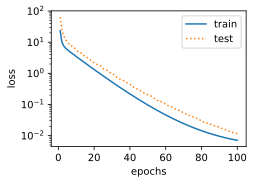

In [10]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 43.997635 test loss 160.8196
weight: [[15.552074]] 
bias: [2.2825117]


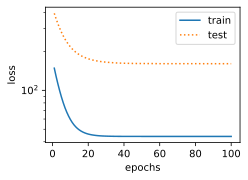

In [11]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.4027369 test loss 103.31421
weight: [[1.3872364 1.9376589 3.5085924]] 
bias: [1.2312856]


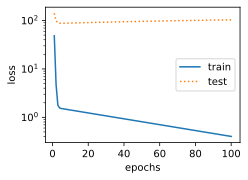

In [12]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])

## 3.12 权重衰减

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import data as gdata, loss as gloss, nn 

n_train, n_test, num_inputs = 20, 100, 200 
true_w, true = nd.ones((num_inputs, 1)) * 0.01, 0.05 

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [0]:
%matplotlib inline 
from IPython import display 
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [16]:
features[0], labels[0]

(
 [ 1.2582678 -0.9184961]
 <NDArray 2 @cpu(0)>, 
 [9.845844]
 <NDArray 1 @cpu(0)>)

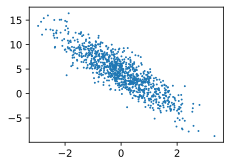

In [25]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);